In [48]:
# import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



In [49]:
# read the dataset
main_df = pd.read_csv('QualityPrediction.csv')
main_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [50]:
df = main_df.copy()

In [51]:
# Task --> Build a model on provided data to give wine score from 1 to 10 based.

# Data Cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We have 11 independent conitnuous numerical variables and 1 Target/Dependent categorical Variable.
All variables dataype are correct and we dont have any typos/special character in data.

In [53]:
# check for duplicate rows in data

df.duplicated().any()


True

In [54]:
df.duplicated().sum()

240

In [55]:
# checking target variable category counts before removing duplicate values

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Some category have very less data. We will explore it more during Imbalance data processing.

In [56]:
# drop duplicate rows

df = df.drop_duplicates()

In [57]:
df.duplicated().any()

False

In [58]:
# Target values after removing  
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [12]:
# 240 duplicate rows are removed.

# EDA - Exploratory Data Analysis

## Univariate Analysis

In [13]:
# variation of all variables

df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [14]:
# Independent Variables have difference in variation. Feature scaling will be required.

In [36]:
# no. of unique values in each variables.
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Text(0.5, 1.0, 'Ditribution of classes in Quality Variable')

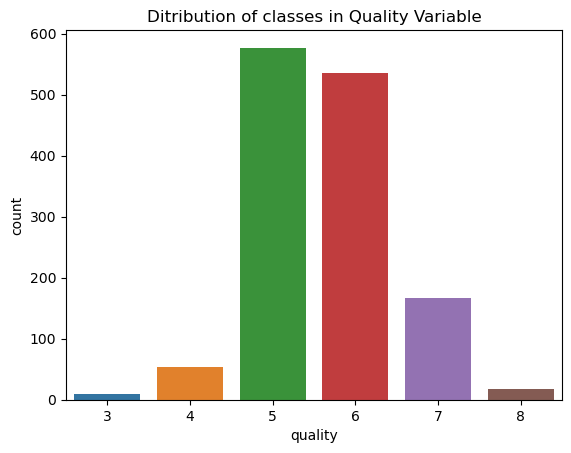

In [16]:
# check distribution of Dependent variables

sns.countplot(x=df['quality'])
plt.title('Ditribution of classes in Quality Variable')

class 3 have lowest data points and class 5 have highest data. Dataset is clearly imbalanced.

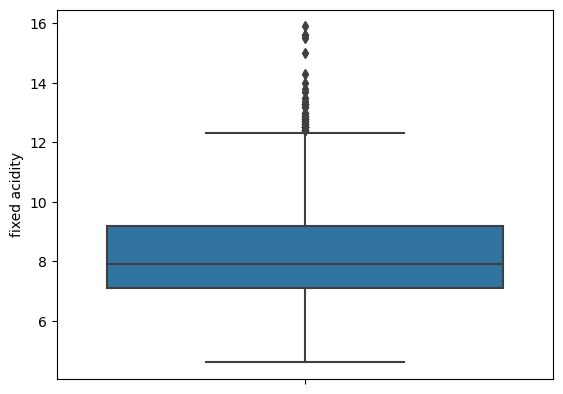

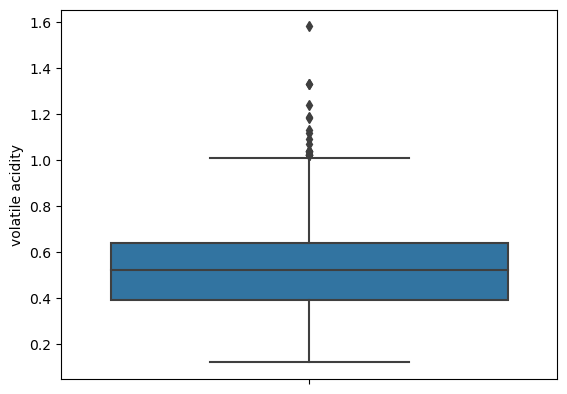

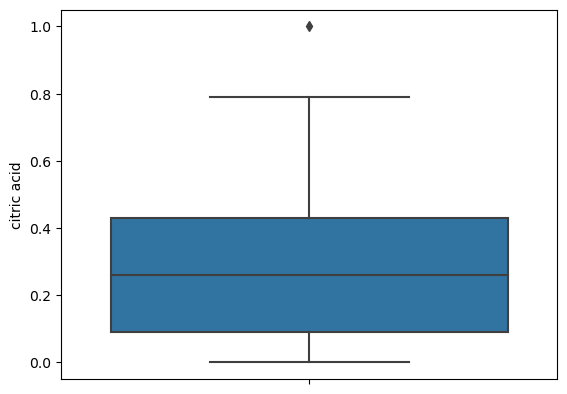

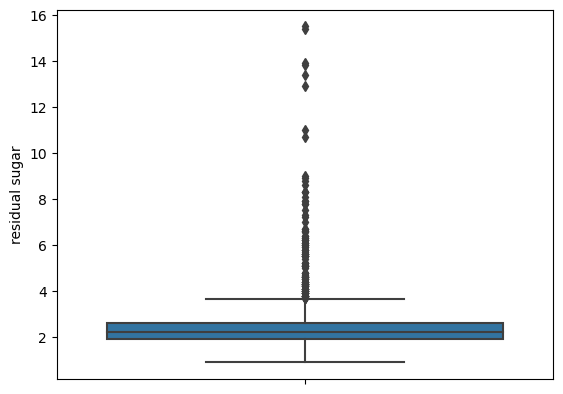

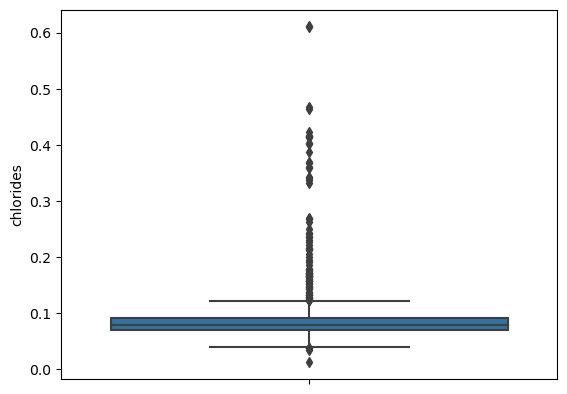

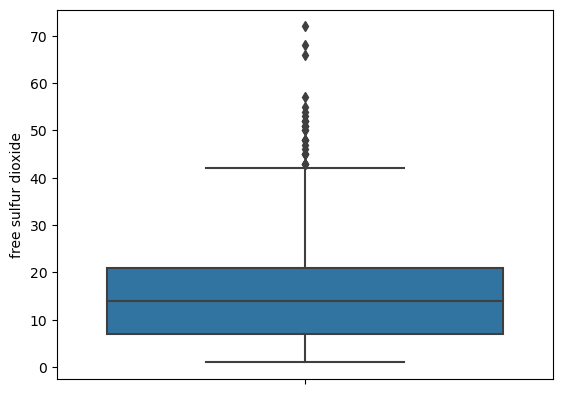

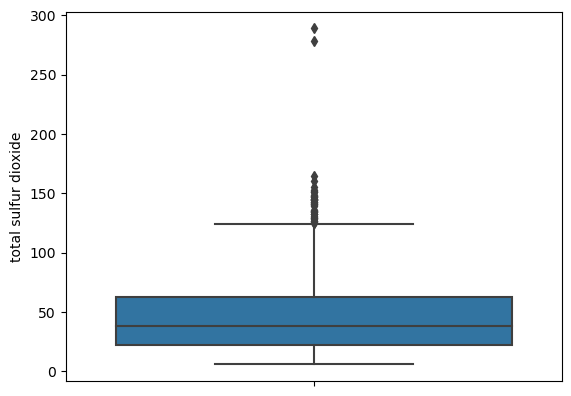

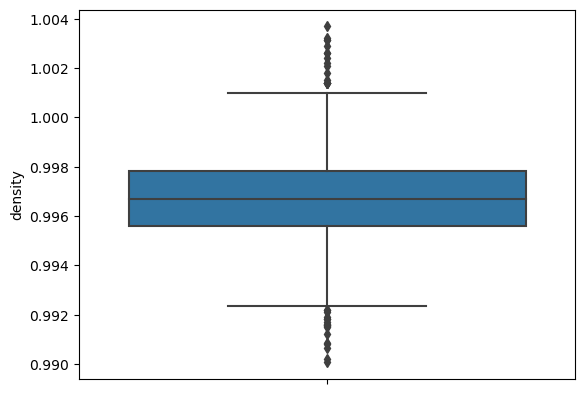

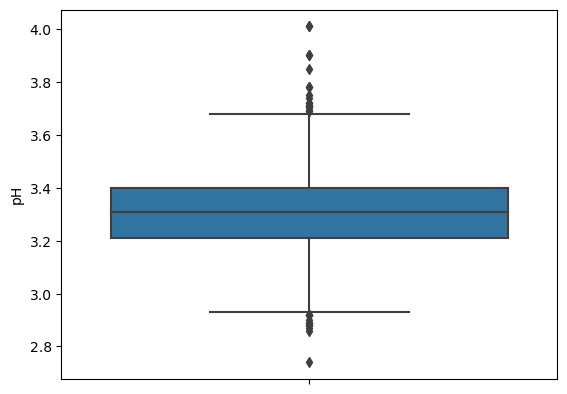

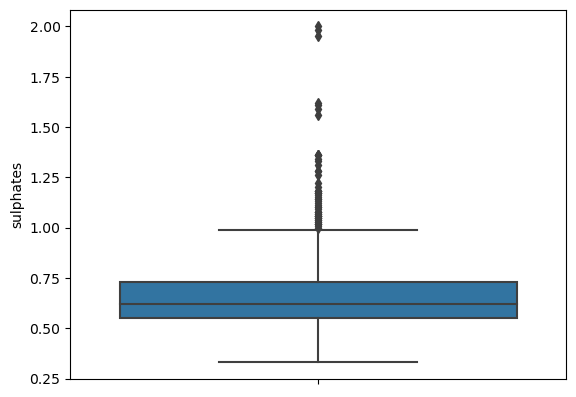

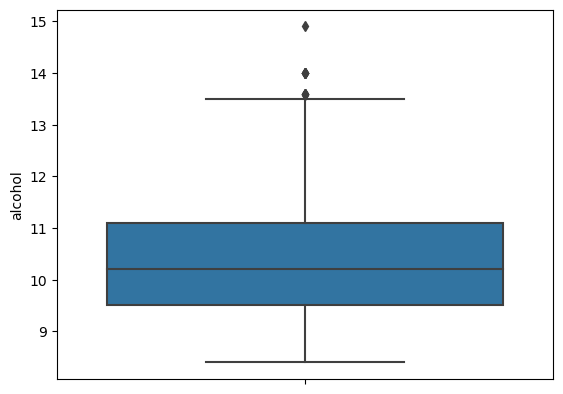

In [17]:
# boxplot for all independent variable

for label in df.columns[:-1]:
    sns.boxplot(y=label, data=df)
    plt.show()

As per boxplot, every indepedent variable has outliers and most of the variabels have skewed distribution. We will explore outlier handling in preprocessing step.

## Bivariate Analysis

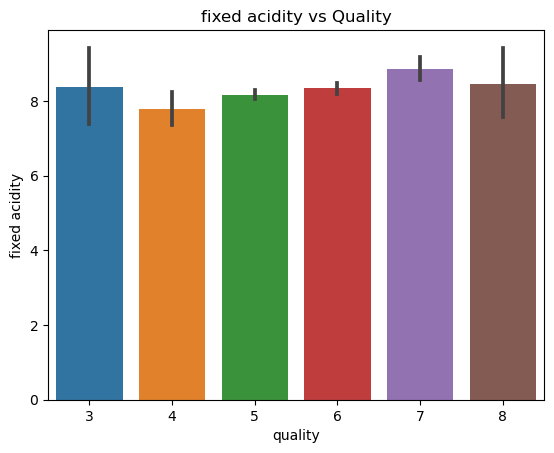

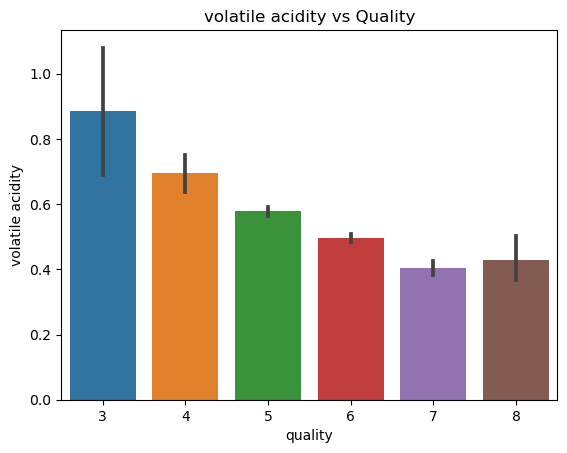

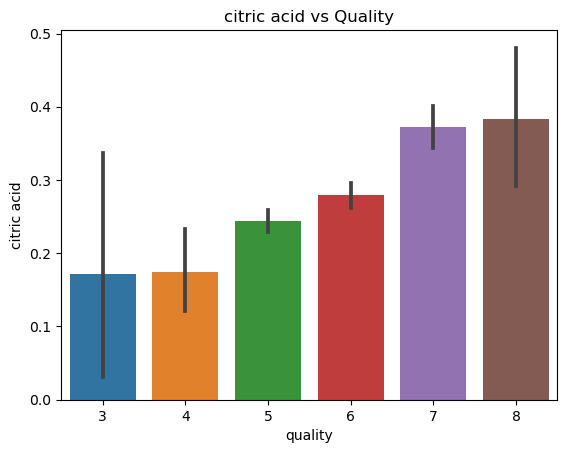

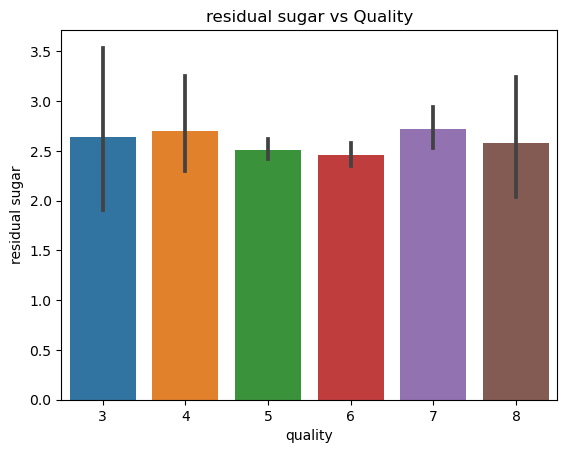

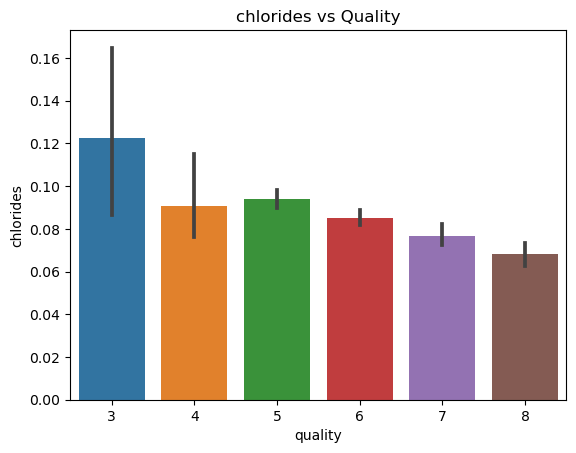

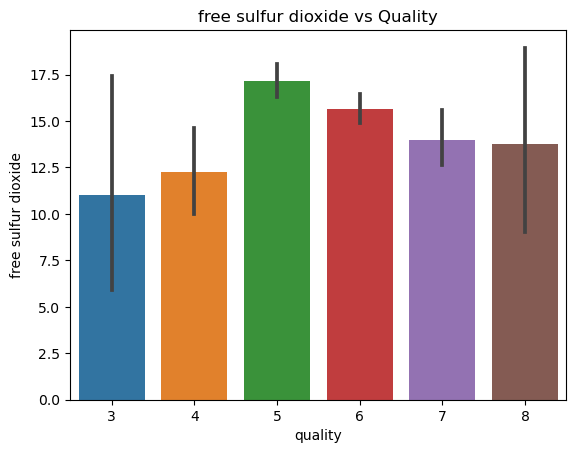

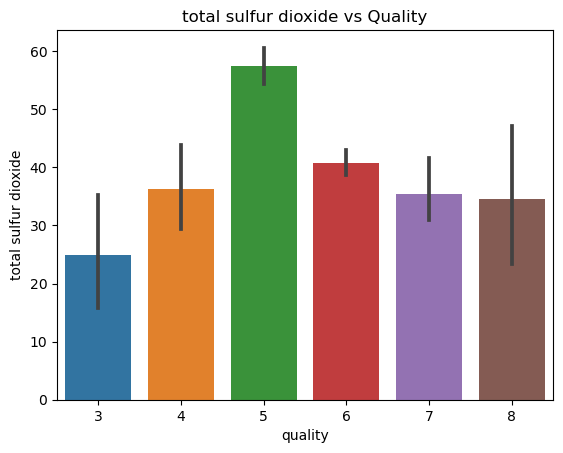

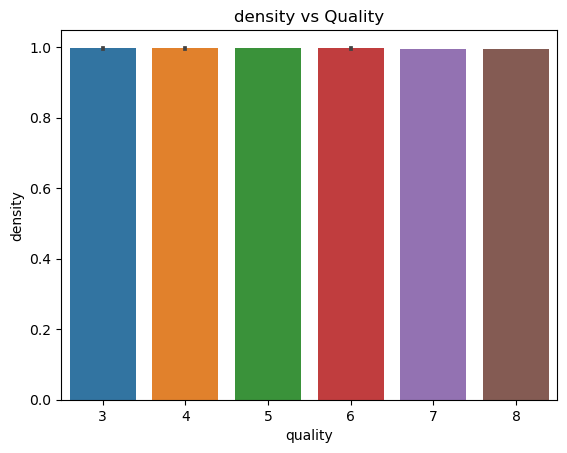

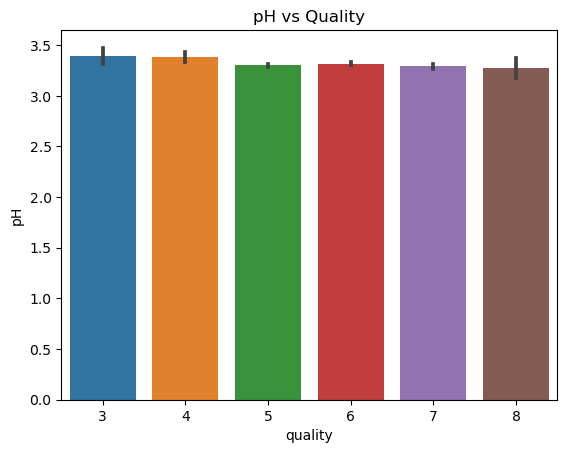

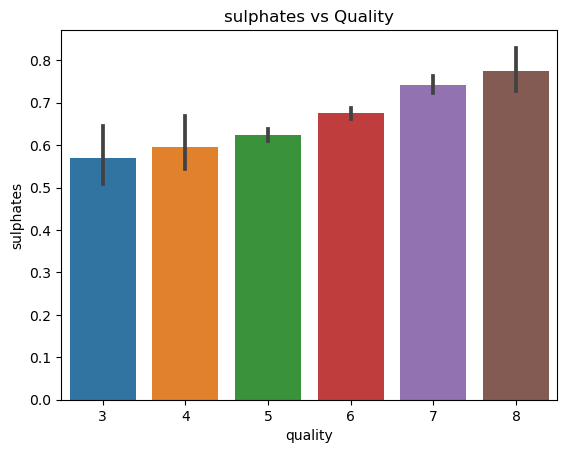

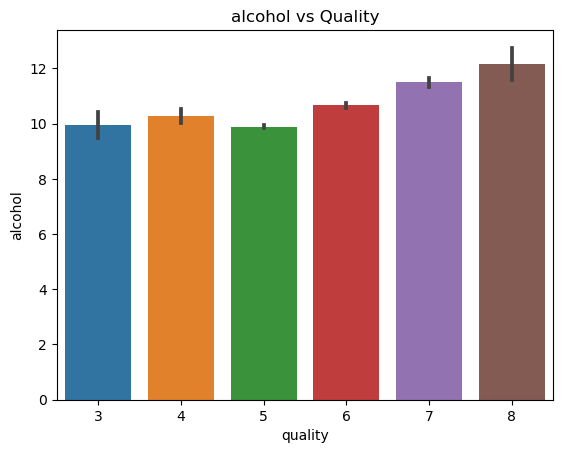

In [18]:
# categorical Dependent variable vs Independent Variable  bar plot

for label in df.columns[:-1]:
    sns.barplot(x='quality', y=label, data=df )
    plt.title(f'{label} vs Quality')
    plt.show()

Observation:
- 'Volatile acidity' mean decreasing as the 'quality' score increases
- 'crtric acid' mean increasing as the 'quality' score increases
- 'chlorides' mean decreasing as the 'quality' score increases
- 'sulphates' mean increasing as the 'quality' score increases
-  'alcohol' mean has exponential increase as the 'quality' score increases

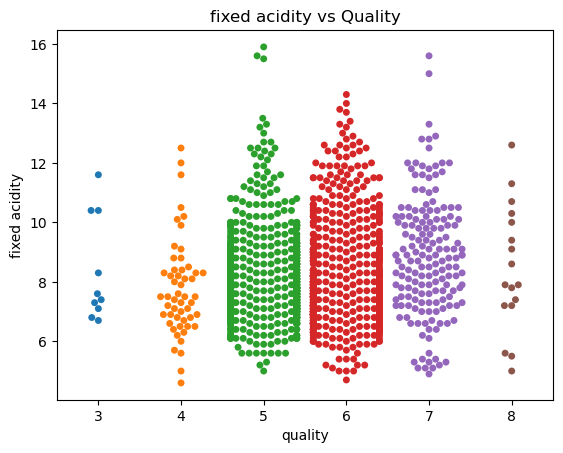

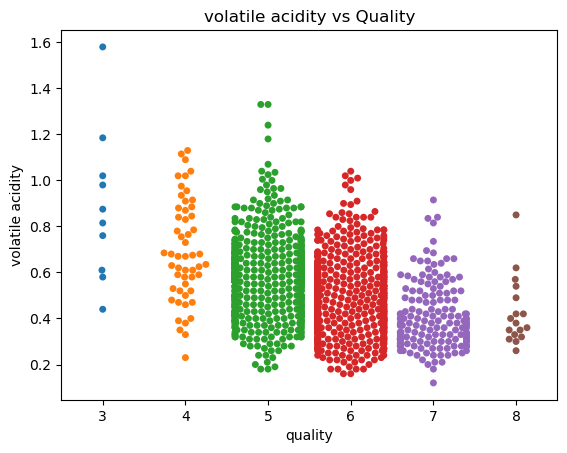

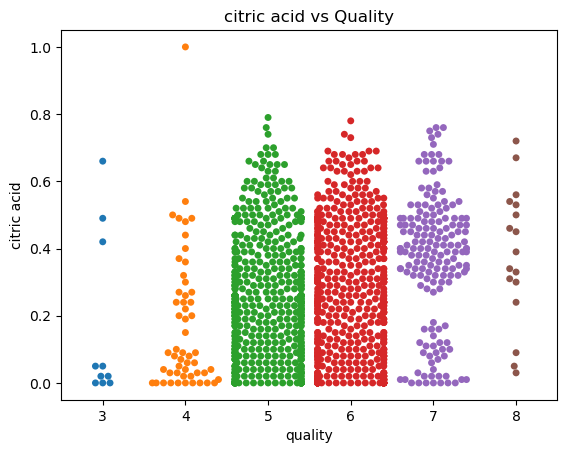

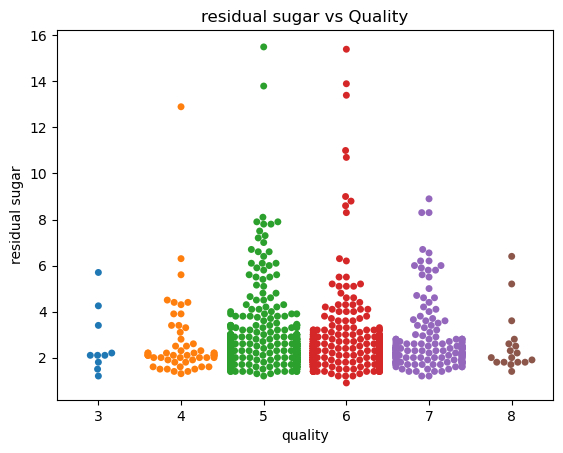

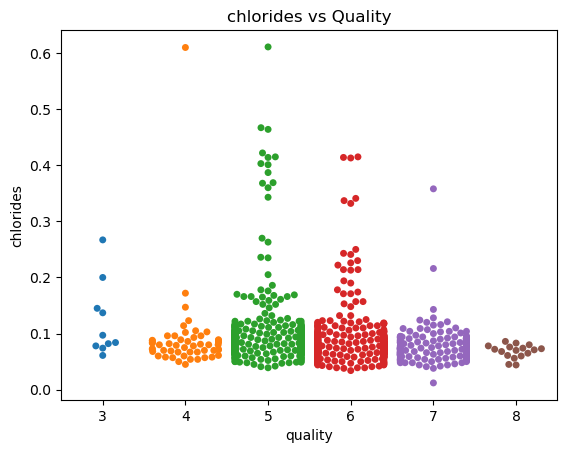

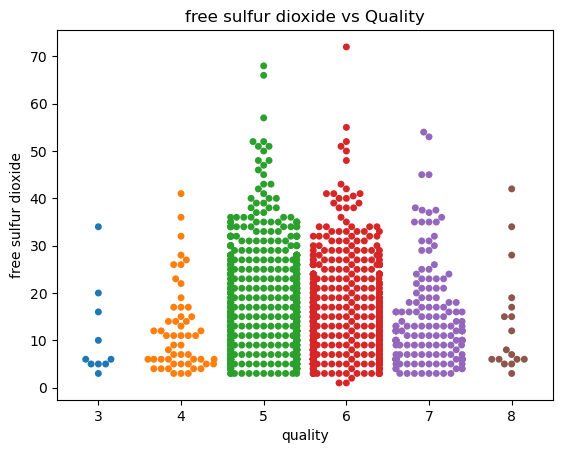

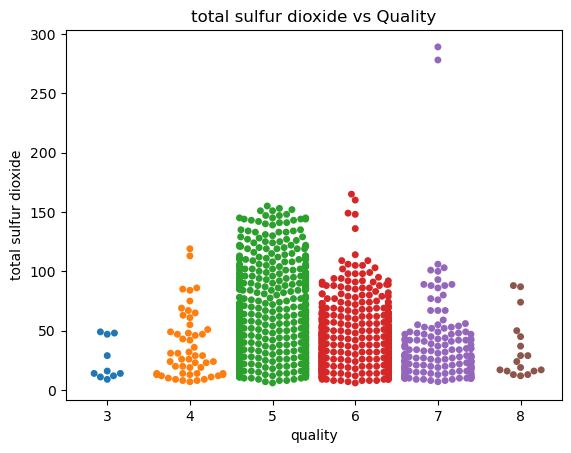

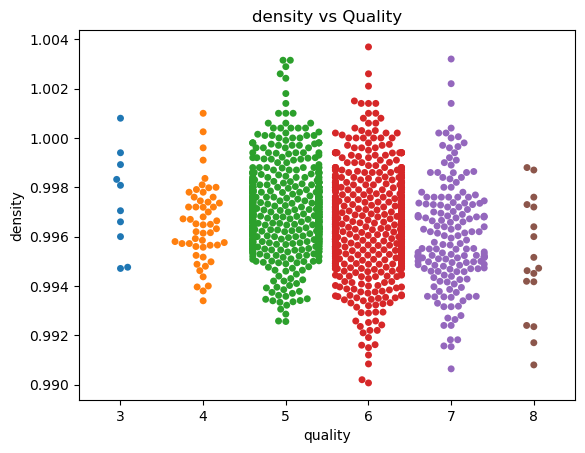

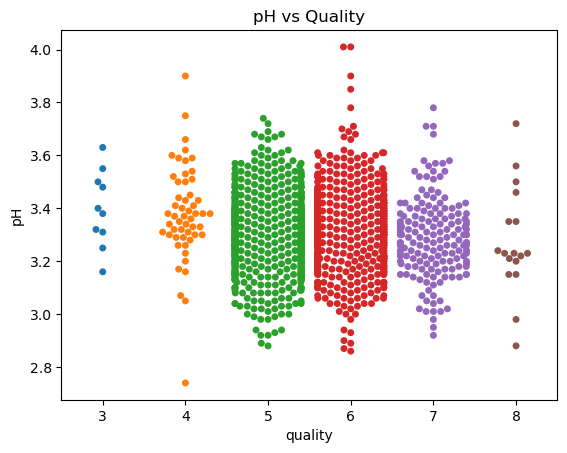

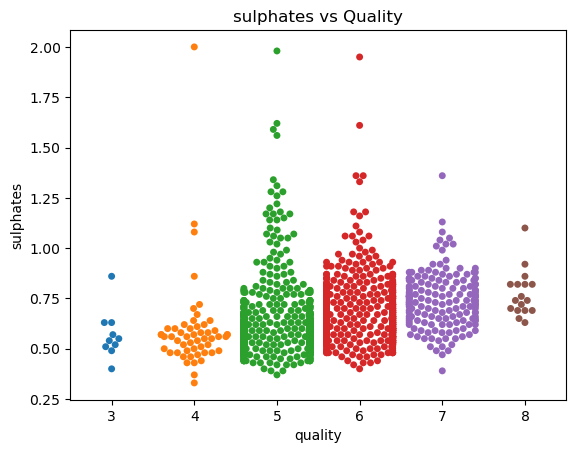

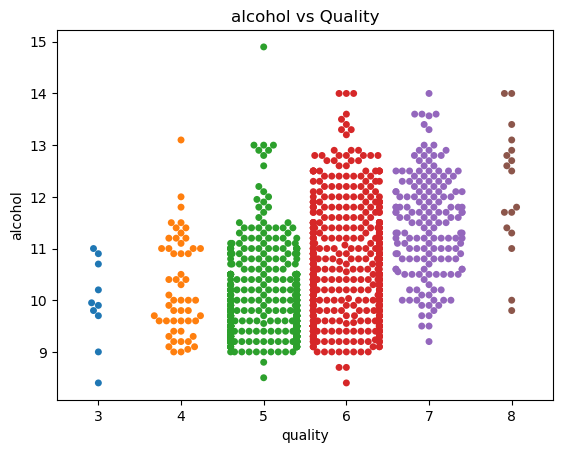

In [144]:
# categorical Dependent variable vs Independent Variable plot

for label in df.columns[:-1]:
    sns.swarmplot(x='quality', y=label, data=df )
    plt.title(f'{label} vs Quality')
    plt.show()

By these plots, we didnt find an clear relation between dependent variable 'quality' and any independent variable.

## Multivariate Analysis

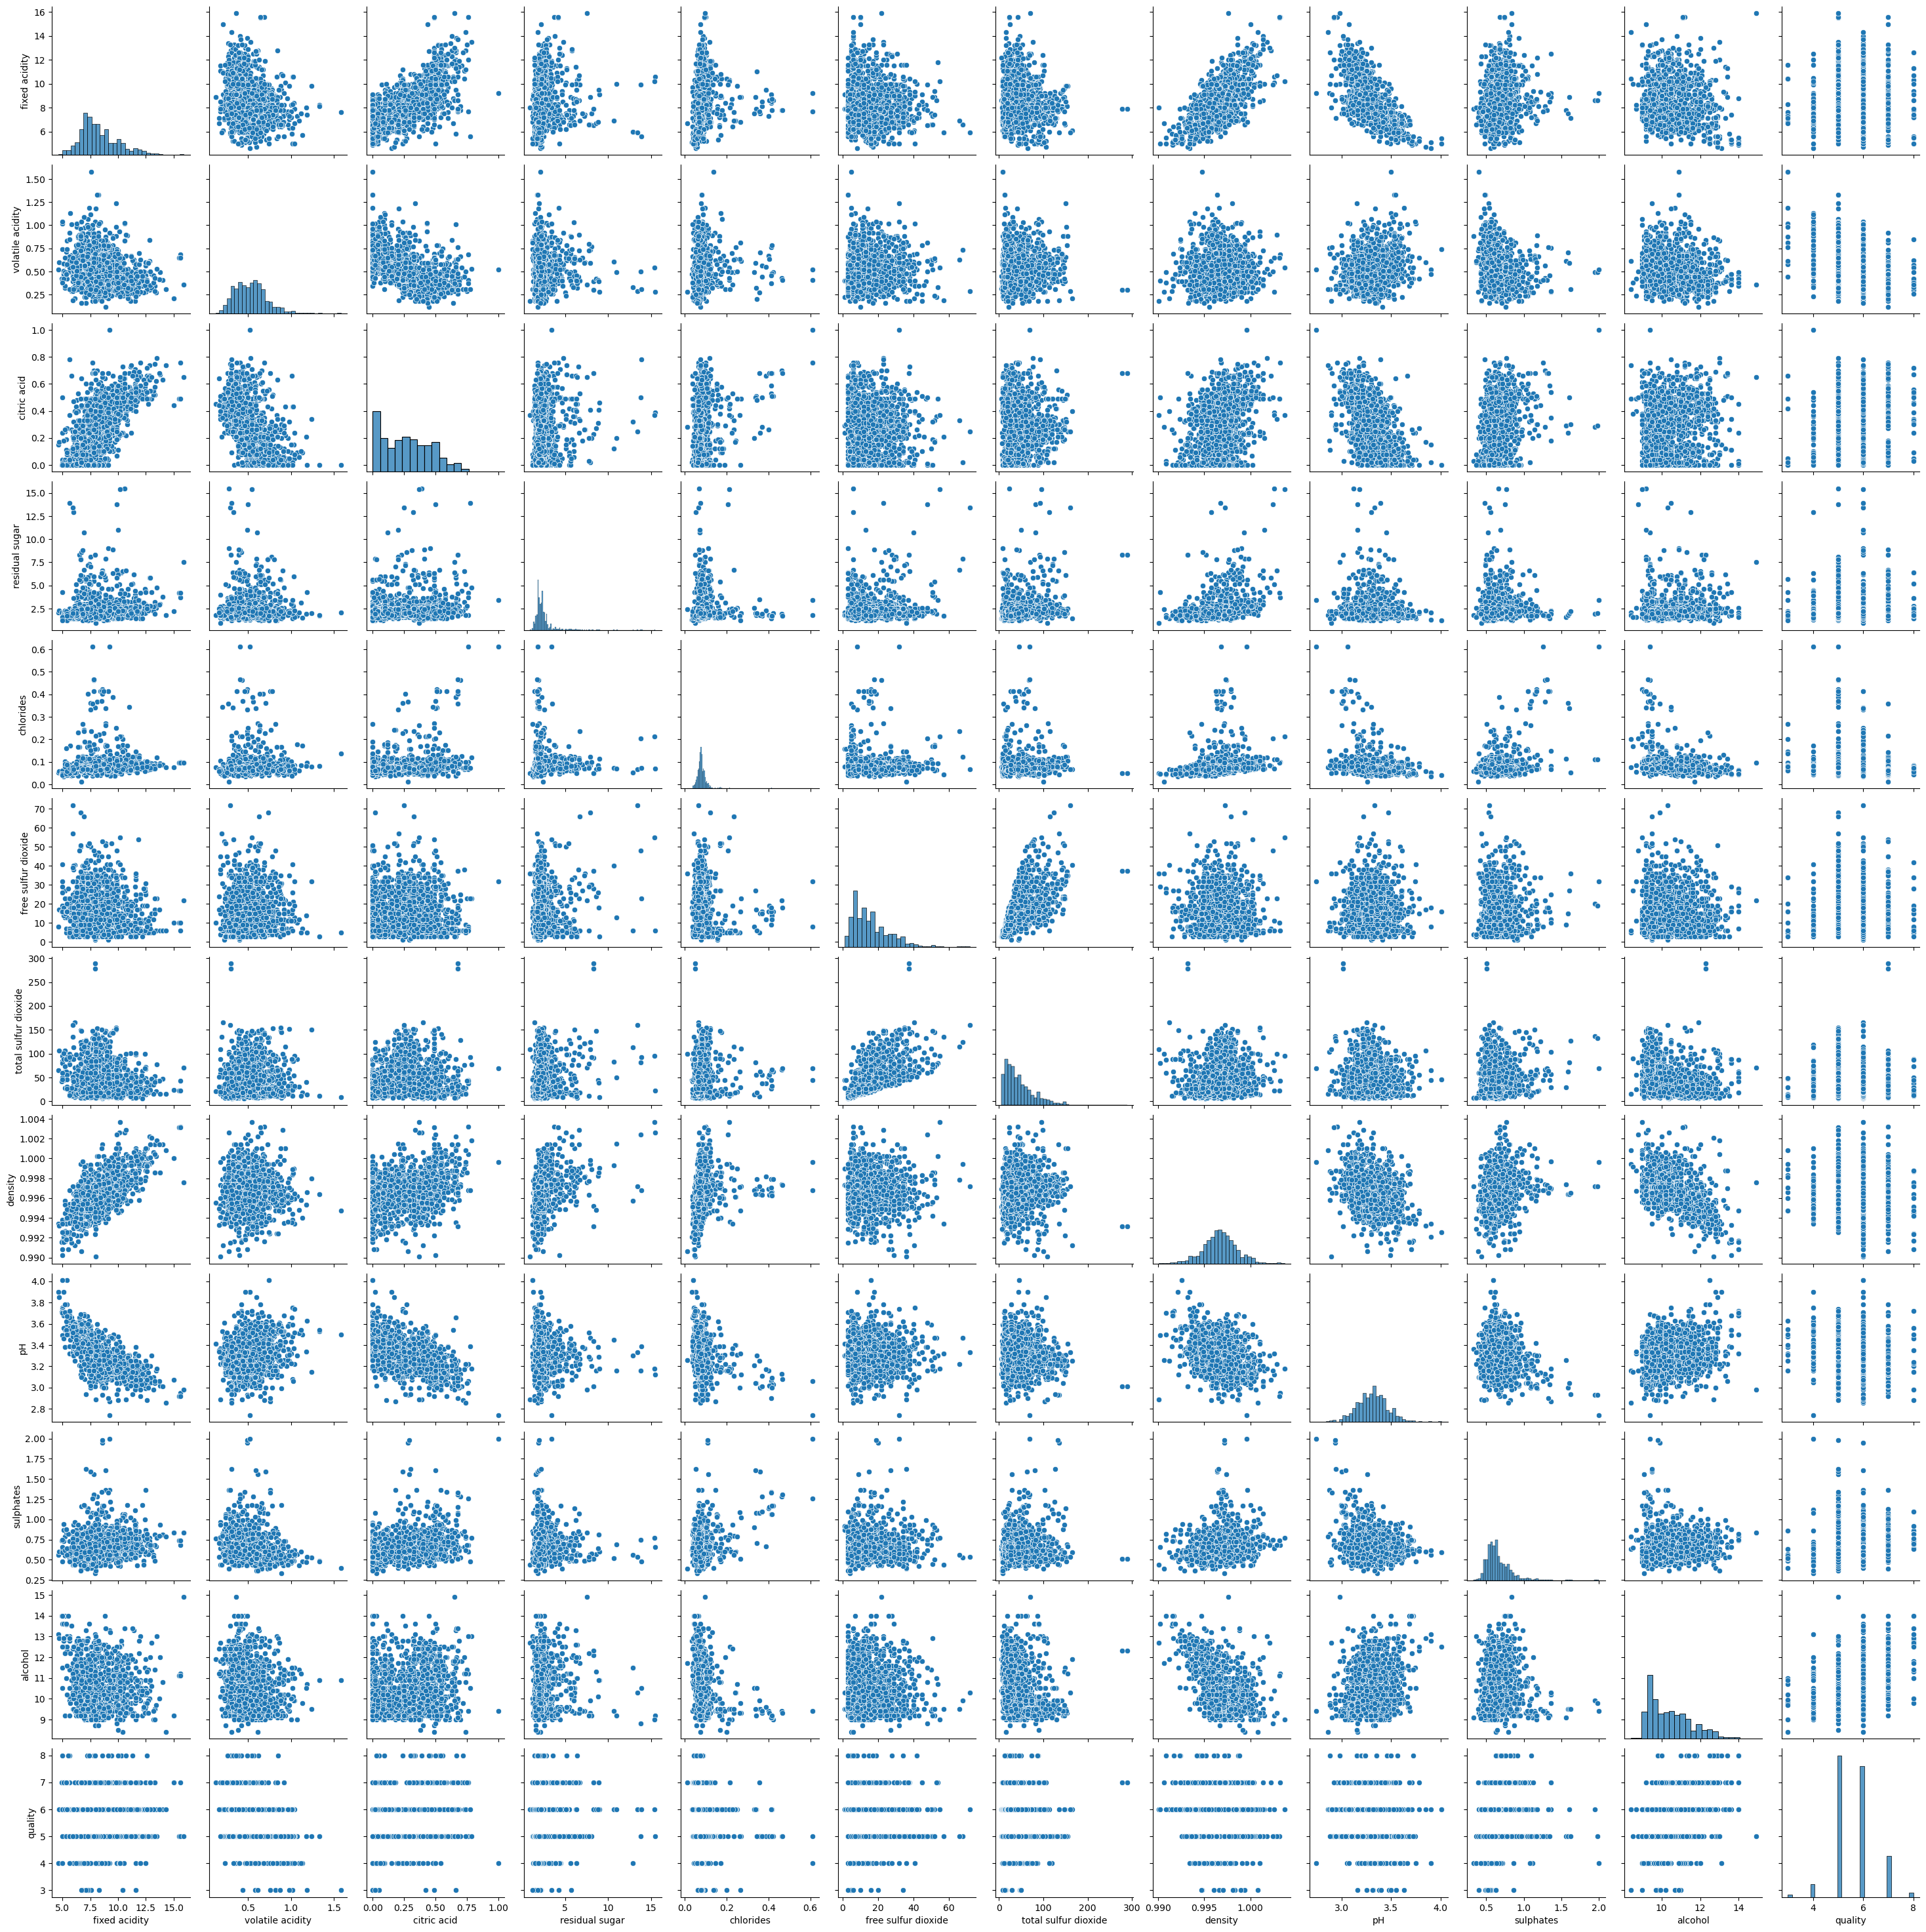

In [146]:
sns.pairplot(df)

some independet variable has linear relation with other independent variable.

<AxesSubplot:>

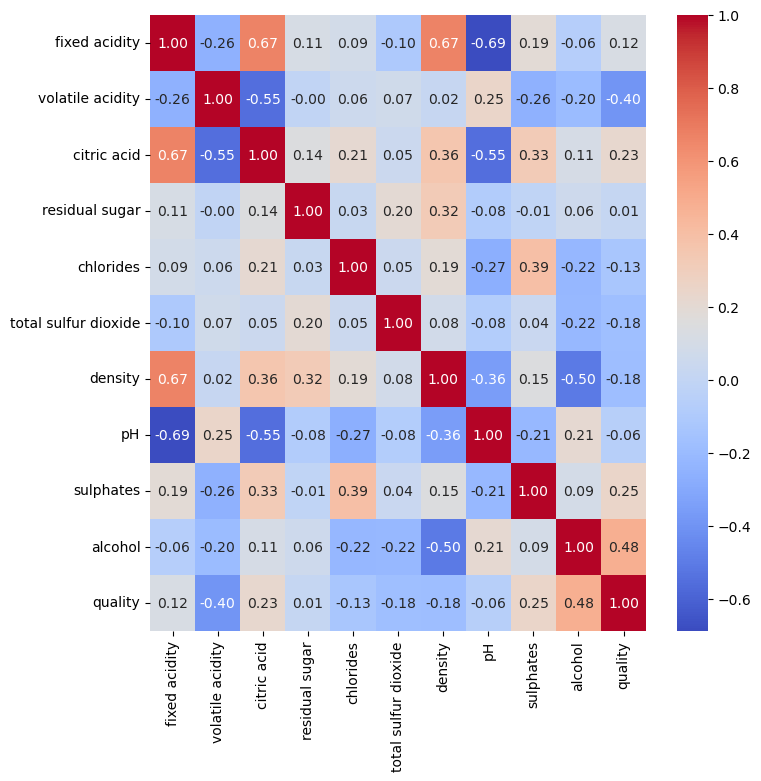

In [102]:
# linear correlation matrix

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt='.2f', annot=True, )

In [148]:
# These variabels have moderate realtion
# 'fixed acidity' --> 'citric acid', 'density', 'pH'    (+-0.6 to +-0.7)
# 'volatile acidity' --> 'citric acid'  (-0.55)
# 'citric acid' --> 'pH' (-0.55)
# 'free suplhur dioxide' --> 'total sulfur dioxide'   (+.67)
# 'density' --> alcohol (+.5)


<AxesSubplot:>

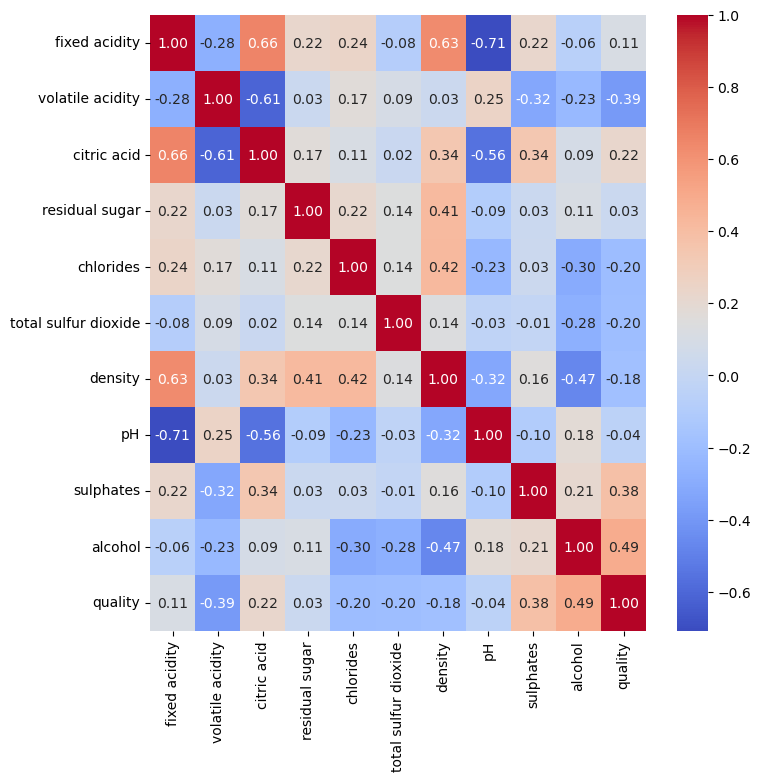

In [103]:
# non=linear correaltion matrix

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(method='spearman'), fmt='.2f', cmap = 'coolwarm', annot=True, )

In [150]:
# These variabels have moderate realtion
# 'fixed acidity' --> 'citric acid', 'density', 'pH'     (+-0.6 to +-0.71)
# 'volatile acidity' --> 'citric acid'  (-0.61)
# 'citric acid' --> 'pH' (-0.56)

# These variabels have strong realtion
# 'free suplhur dioxide' --> 'total sulfur dioxide'   (+.79)


In [13]:
# dropping 'free sulphur dioxide' variable

df = df.drop(['free sulfur dioxide'], axis=1)

In [14]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   total sulfur dioxide  density    pH  sulphates  alcohol  quality  
0                  34.0   0.9978  3.51       0.56      9.4        5  
1                  67.0   0.9968  3.20       0.68      9.8        5  
2                  54.0   0.9970  3.26       0.65      9.8        5  
3                  60.0   0.9980  3.16       0.58      9.8        6  
5                  40.0   0.9978  3.51       0.56      9.4        5

# Data Preprocessing

### Missing values

In [15]:
# check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data has no missing values.

### Outlier

In [16]:
# For classifcation problem outlier treatment not requried.

### Label Encoding

In [17]:
# We dont have any object type column. label encoding not required.

### Independent and Dependent Variable Split

In [59]:
x = df.iloc[:, :-1]
# x = df.drop('quality',axis=1)

y = df['quality']

### Imbalance dataset

In [60]:
# imbalance dataset
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [61]:
# majority class = 577
# minority class = 10

# data is imbalanced. Oversampling will lead to biasness in the data.
# we will try to add class weights in model.

### Train test data split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8, random_state=5)

x_train.shape

(1087, 11)

In [63]:
x_test.shape

(272, 11)

In [64]:
y_train.value_counts()

5    472
6    416
7    131
4     46
8     13
3      9
Name: quality, dtype: int64

In [65]:
y_test.value_counts()

6    119
5    105
7     36
4      7
8      4
3      1
Name: quality, dtype: int64

### Feature Scaling

In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Model Building

## Logistic Regression

In [25]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [26]:
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))

Train accuracy : 0.619233776387803
Test accuracy : 0.575


In [27]:
print('Train :\n', classification_report(y_train, y_train_pred))
print('Test :\n', classification_report(y_test, y_test_pred))

Train :
               precision    recall  f1-score   support

           3       0.33      0.11      0.17         9
           4       0.00      0.00      0.00        43
           5       0.67      0.77      0.72       551
           6       0.56      0.62      0.59       506
           7       0.60      0.35      0.44       157
           8       0.00      0.00      0.00        13

    accuracy                           0.62      1279
   macro avg       0.36      0.31      0.32      1279
weighted avg       0.59      0.62      0.60      1279

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   mac

In [29]:
# this model has high bias (underfitted). 
# train Avg F1 score = 0.28
# test Avg F1 score = 0.28
# train data accuracy = .59
# test data accuracy = .59

In [30]:
# Drop this model and build other model.

## Decision Tree

In [31]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)

y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [32]:
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))

Train accuracy : 1.0
Test accuracy : 0.5625


In [33]:
print('Train :\n', classification_report(y_train, y_train_pred))
print('Test :\n', classification_report(y_test, y_test_pred))

Train :
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       457
           6       1.00      1.00      1.00       432
           7       1.00      1.00      1.00       136
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.17      0.09      0.12        11
           5       0.66      0.72      0.69       120
           6       0.54      0.53      0.54       103
           7       0.34      0.35      0.35        31
           8       0.00      0.00      0.00         3

    accuracy                           0.56       272
   mac

In [34]:
# this model has high variance (overfitting). 
# train Avg F1 score = 1
# test Avg F1 score = 0.28
# train data accuracy = 1
# test data accuracy = 0.56

In [ ]:
# we will try to overcome the high variance problem with Random forest model.

## Support Vector Machine

In [49]:
svc = SVC(random_state=42)

svc.fit(x_train, y_train)
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [50]:
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))

Train accuracy : 0.6458141674333027
Test accuracy : 0.6323529411764706


In [51]:
print('Train :\n', classification_report(y_train, y_train_pred))
print('Test :\n', classification_report(y_test, y_test_pred))

Train :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        42
           5       0.71      0.76      0.74       457
           6       0.59      0.73      0.65       432
           7       0.62      0.26      0.36       136
           8       0.00      0.00      0.00        14

    accuracy                           0.65      1087
   macro avg       0.49      0.30      0.30      1087
weighted avg       0.65      0.65      0.62      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.68      0.73      0.71       120
           6       0.57      0.67      0.61       103
           7       0.71      0.48      0.58        31
           8       0.00      0.00      0.00         3

    accuracy                           0.63       272
   mac

In [57]:
# this model has high bias (underfitting). 
# train Avg F1 score = 0.3
# test Avg F1 score = 0.32
# train data accuracy = 0.64
# test data accuracy = 0.63

In [53]:
# we will try to hypertune this model for better result.

# KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [59]:
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))

Train accuracy : 0.6890524379024839
Test accuracy : 0.5772058823529411


In [60]:
print('Train :\n', classification_report(y_train, y_train_pred))
print('Test :\n', classification_report(y_test, y_test_pred))

Train :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.59      0.24      0.34        42
           5       0.72      0.82      0.76       457
           6       0.66      0.69      0.67       432
           7       0.68      0.51      0.58       136
           8       0.00      0.00      0.00        14

    accuracy                           0.69      1087
   macro avg       0.44      0.37      0.39      1087
weighted avg       0.67      0.69      0.68      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.63      0.71      0.67       120
           6       0.57      0.55      0.56       103
           7       0.45      0.48      0.47        31
           8       0.00      0.00      0.00         3

    accuracy                           0.58       272
   mac

In [ ]:
# this model has high bias (underfitting). 
# train Avg F1 score = 0.39
# test Avg F1 score = 0.28
# train data accuracy = 0.68
# test data accuracy = 0.57

In [64]:
# find best k value

accu_test = []
accu_train = []
for i in range(2,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    accu_train.append(knn.score(x_train,y_train))
    accu_test.append(knn.score(x_test,y_test))


Text(0.5, 0, 'K value')

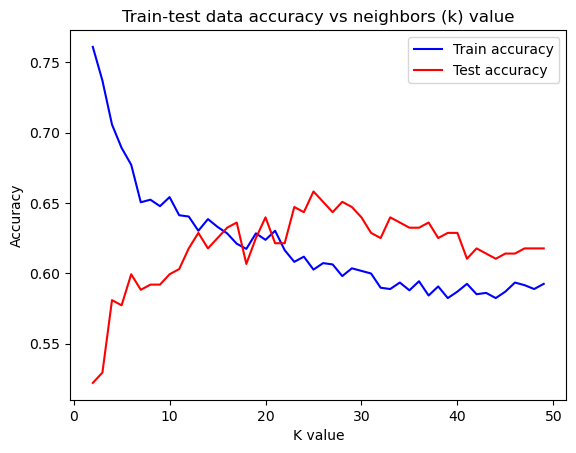

In [71]:
plt.plot(range(2,50), accu_train, c='blue', label = 'Train accuracy')
plt.plot(range(2,50), accu_test, c='red', label = 'Test accuracy')
plt.title('Train-test data accuracy vs neighbors (k) value')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('K value')

In [ ]:
# Trade off between Train and test accuracy is at k=20 and accuracy is around .63.
# Model is still undefitted. Drop this model.

## Random Forest

In [66]:
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [67]:
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))

Train accuracy : 1.0
Test accuracy : 0.6286764705882353


In [68]:
print('Train :\n', classification_report(y_train, y_train_pred))
print('Test :\n', classification_report(y_test, y_test_pred))

Train :
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00       472
           6       1.00      1.00      1.00       416
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.82      0.72       105
           6       0.64      0.62      0.63       119
           7       0.46      0.31      0.37        36
           8       0.00      0.00      0.00         4

    accuracy                           0.63       272
   mac

In [23]:
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))

Train accuracy : 1.0
Test accuracy : 0.659375


In [ ]:
# this model has high variance (overfitting). 
# train Avg F1 score = 1
# test Avg F1 score = 0.33
# train data accuracy = 1
# test data accuracy = 0.66

In [24]:
rf.score(x_test, y_test)

0.659375

# Naive Bayes - (MultinomialNB)

In [ ]:
# MultinomialNB can not work with negative data. So MinMaxScaler used so range will be 0 to 1.

In [83]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y, train_size=.8, random_state=42)

minmax = MinMaxScaler()

x1_train = minmax.fit_transform(x1_train)
x1_test = minmax.transform(x1_test)

In [84]:
nb = MultinomialNB()

nb.fit(x1_train, y1_train)

y1_train_pred = nb.predict(x1_train)
y1_test_pred = nb.predict(x1_test)


In [85]:
print('Train accuracy :', accuracy_score(y1_train, y1_train_pred))
print('Test accuracy :', accuracy_score(y1_test, y1_test_pred))

Train accuracy : 0.5390984360625575
Test accuracy : 0.5882352941176471


In [87]:
print('Train :\n', classification_report(y_train, y1_train_pred))
print('Test :\n', classification_report(y_test, y1_test_pred))

Train :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        42
           5       0.57      0.86      0.68       457
           6       0.49      0.44      0.47       432
           7       0.00      0.00      0.00       136
           8       0.00      0.00      0.00        14

    accuracy                           0.54      1087
   macro avg       0.18      0.22      0.19      1087
weighted avg       0.43      0.54      0.47      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.61      0.91      0.73       120
           6       0.55      0.50      0.52       103
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         3

    accuracy                           0.59       272
   mac

In [ ]:
# this model has high bias (underfitting). 
# train Avg F1 score = 0.19
# test Avg F1 score = 0.21
# train data accuracy = 0.53
# test data accuracy = 0.58

In [ ]:
# Drop this model.

# Hypertuning and cross validation

### SVM Hypertuning

In [123]:
# parameters
param_grid = {'C':[0.01,0.5,1,5,10], 'gamma':[1,0.5,0.1,0.05,0.01],
              'kernel':['linear','polynomial', 'rbf'], 'degree':[2,3], 'class_weight':[None,'balanced']}       

grid = GridSearchCV(svc, param_grid=param_grid, refit=True, cv=15, verbose=2, n_jobs=-1)

grid.fit(x_train, y_train)

# best parameters:
print(f'Best Hyperparameters by grid {grid.best_params_}')

y_train_pred_grid = grid.predict(x_train)
y_test_pred_grid = grid.predict(x_test)

print('Train accuracy : ', accuracy_score(y_train, y_train_pred_grid))
print('Test accuracy : ', accuracy_score(y_test, y_test_pred_grid))


Fitting 15 folds for each of 300 candidates, totalling 4500 fits
Best Hyperparameters by grid {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Train accuracy :  0.6458141674333027
Test accuracy :  0.6323529411764706


In [122]:
print('Train :\n', classification_report(y_train, y_train_pred_grid))
print('Test :\n', classification_report(y_test, y_test_pred_grid))

Train :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        42
           5       0.71      0.76      0.74       457
           6       0.59      0.73      0.65       432
           7       0.62      0.26      0.36       136
           8       0.00      0.00      0.00        14

    accuracy                           0.65      1087
   macro avg       0.49      0.30      0.30      1087
weighted avg       0.65      0.65      0.62      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.68      0.73      0.71       120
           6       0.57      0.67      0.61       103
           7       0.71      0.48      0.58        31
           8       0.00      0.00      0.00         3

    accuracy                           0.63       272
   mac

In [ ]:
#                      Old       New
# train Avg F1 score = 0.3       0.3
# test Avg F1 score = 0.32       0.32
# train data accuracy = 0.64     0.65
# test data accuracy = 0.63      0.63

In [ ]:
# we didnt find any significant improvement after hypertuning.

### Random Forest Hypertuning

In [129]:
# find best value of cv

for i in range(2,21):
    acc = cross_val_score(rf, x_train, y_train, cv=i)
    print('cv :',i, '| mean accuracy :', acc.mean().round(3), '| max accuracy :', acc.max().round(3))

cv : 2 | mean accuracy : 0.572 | max accuracy : 0.577
cv : 3 | mean accuracy : 0.561 | max accuracy : 0.566
cv : 4 | mean accuracy : 0.58 | max accuracy : 0.61
cv : 5 | mean accuracy : 0.574 | max accuracy : 0.615
cv : 6 | mean accuracy : 0.584 | max accuracy : 0.619
cv : 7 | mean accuracy : 0.586 | max accuracy : 0.645
cv : 8 | mean accuracy : 0.584 | max accuracy : 0.603
cv : 9 | mean accuracy : 0.578 | max accuracy : 0.62
cv : 10 | mean accuracy : 0.583 | max accuracy : 0.624
cv : 11 | mean accuracy : 0.586 | max accuracy : 0.657
cv : 12 | mean accuracy : 0.587 | max accuracy : 0.648
cv : 13 | mean accuracy : 0.593 | max accuracy : 0.643
cv : 14 | mean accuracy : 0.579 | max accuracy : 0.654
cv : 15 | mean accuracy : 0.586 | max accuracy : 0.699
cv : 16 | mean accuracy : 0.587 | max accuracy : 0.691
cv : 17 | mean accuracy : 0.583 | max accuracy : 0.672
cv : 18 | mean accuracy : 0.605 | max accuracy : 0.705
cv : 19 | mean accuracy : 0.58 | max accuracy : 0.684
cv : 20 | mean accurac

In [ ]:
# best cv value is 18.

In [181]:
#parameters set-1
param_grid = {'n_estimators':[500,750,1000], 'class_weight':[None,'balanced', 'balanced_subsample'],
              'max_leaf_nodes':[34, 55, 89, 144], 'min_samples_leaf':[3,5,8]
          }       

grid = GridSearchCV(rf, param_grid=param_grid, refit=True, cv=18, verbose=2, n_jobs=-1)

grid.fit(x_train, y_train)

# best parameters:
print(f'Best Hyperparameters by grid {grid.best_params_}')

y_train_pred_grid = grid.predict(x_train)
y_test_pred_grid = grid.predict(x_test)

print('Train data : ', accuracy_score(y_train, y_train_pred_grid))
print('Test data : ', accuracy_score(y_test, y_test_pred_grid))

Fitting 18 folds for each of 108 candidates, totalling 1944 fits
Best Hyperparameters by grid {'class_weight': None, 'max_leaf_nodes': 144, 'min_samples_leaf': 3, 'n_estimators': 750}
Train data :  0.9034038638454461
Test data :  0.6691176470588235


In [182]:
print('Train :\n', classification_report(y_train, y_train_pred_grid))
print('Test :\n', classification_report(y_test, y_test_pred_grid))

Train :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.21      0.35        42
           5       0.90      0.98      0.94       457
           6       0.90      0.96      0.93       432
           7       0.91      0.81      0.86       136
           8       0.00      0.00      0.00        14

    accuracy                           0.90      1087
   macro avg       0.62      0.49      0.51      1087
weighted avg       0.89      0.90      0.89      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.73      0.76      0.75       120
           6       0.60      0.75      0.66       103
           7       0.74      0.45      0.56        31
           8       0.00      0.00      0.00         3

    accuracy                           0.67       272
   mac

In [ ]:
#                      old     new
# train Avg F1 score = 1       .51
# test Avg F1 score = 0.33     .33
# train data accuracy = 1      .67
# test data accuracy = 0.66    .67

# we didnt find any significant improvement in test accuracy after hypertuninga and Variance is still high.

In [184]:
#parameters set-2
param_grid = {'n_estimators':[500,750,1000], 'class_weight':[None,'balanced', 'balanced_subsample'],
              'max_depth':[3,5,8], 'min_samples_leaf':[3,5,8]
          }       

grid = GridSearchCV(rf, param_grid=param_grid, refit=True, cv=18, verbose=2, n_jobs=-1)

grid.fit(x_train, y_train)

# best parameters:
print(f'Best Hyperparameters by grid {grid.best_params_}')

y_train_pred_grid = grid.predict(x_train)
y_test_pred_grid = grid.predict(x_test)

print('Train data : ', accuracy_score(y_train, y_train_pred_grid))
print('Test data : ', accuracy_score(y_test, y_test_pred_grid))

Fitting 18 folds for each of 81 candidates, totalling 1458 fits
Best Hyperparameters by grid {'class_weight': None, 'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 1000}
Train data :  0.8031278748850046
Test data :  0.6580882352941176


In [187]:
print('Train :\n', classification_report(y_train, y_train_pred_grid))
print('Test :\n', classification_report(y_test, y_test_pred_grid))

Train :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        42
           5       0.81      0.90      0.85       457
           6       0.77      0.86      0.81       432
           7       0.91      0.65      0.76       136
           8       0.00      0.00      0.00        14

    accuracy                           0.80      1087
   macro avg       0.42      0.40      0.40      1087
weighted avg       0.76      0.80      0.78      1087

Test :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.71      0.72      0.72       120
           6       0.58      0.74      0.65       103
           7       0.72      0.42      0.53        31
           8       0.00      0.00      0.00         3

    accuracy                           0.65       272
   mac

In [ ]:
#                      old     new
# train Avg F1 score = 1        .4
# test Avg F1 score = 0.33      .32
# train data accuracy = 1       .80
# test data accuracy = 0.66     .65

In [ ]:
# we didnt find any significant improvement in test accuracy after hypertuninga but variance decreased.

# conclusion

In [188]:
# random forest best parameters: 
print(f'Best Hyperparameters by grid {grid.best_params_}')

Best Hyperparameters by grid {'class_weight': None, 'max_depth': 8, 'max_leaf_nodes': 144, 'min_samples_leaf': 3, 'n_estimators': 1000}


In [194]:
# feature importance :
feature_imp = pd.DataFrame([grid.best_estimator_.feature_importances_], index=['Feature importance'], columns=x.columns )
feature_imp

fixed acidity  volatile acidity  citric acid  \
Feature importance       0.068617           0.11229     0.065174   

                    residual sugar  chlorides  total sulfur dioxide   density  \
Feature importance        0.061235   0.076517              0.129815  0.090831   

                          pH  sulphates   alcohol  
Feature importance  0.064279   0.123006  0.208237

In [ ]:
# alcohol is most important feature.

Highest accuracy on test dataset given by Random forest model with hypertuning is around 66%.
We need more data for minority class to improve accuracy and f1 score.